In [3]:
import numpy as np
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")

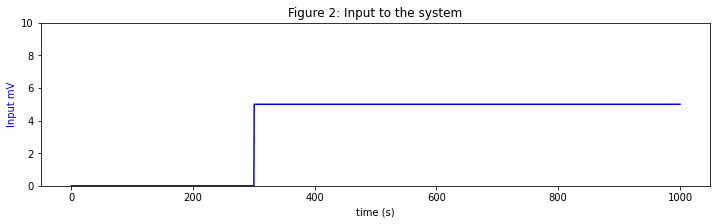

In [5]:
h=0.5 #step size
input_onset=300             # Onset of input
input_amp=5                 # AMPLITUDE OF INPUT


time=np.arange(0,1000.1,h)  # time period 1000ms (1s)

def Input(input_onset,input_amp):
    I=np.zeros((len(time)))     # CURRENT (INPUT)

    for k in range (0,len(time)):
        if time[k] >input_onset:
            I[k]=input_amp # Input change
    return I

# PLOTTING THE INPUT    
fig, ax1 = plt.subplots(figsize=(12,3))
ax1.plot(time, Input(input_onset,input_amp), 'b-') # y label
ax1.set_xlabel('time (s)') # x label
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Input mV', color='b')
ax1.set_ylim(0,input_amp*2) # setting the plotting range
plt.title('Figure 2: Input to the system')
plt.show()

In [6]:
# Numerical Solution to the Izhikevich model
def Discrete_Model(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) # Discrete form of membrane potential of the neuron 
    u = u + h *(a*(b*v-u))            # Discrete form of membrane recovery variable
    return u,v     

In [12]:
def Izhikevich(a,b,c,d):
    v=-65*np.ones((len(time)))  # SETS UP THE INITIAL VALUES of the membrane potential
    u=0*np.ones((len(time)))    # SETS UP THE INITIAL VALUES of the membrane recovery
    u[0]=b*v[0]                 # INITIAL CONDITION 
    
    spiketime=[]
    fired=[]
    I=Input(input_onset,input_amp)
    # EULER METHOD
    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Discrete_Model(a,b,u[k],v[k],I[k]) # Numerically solving the equations at each time point
           
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d
    plot_input_output(time,v,I,a,b,c,d)   

In [13]:
def plot_input_output(time,v,I,a,b,c,d):   
    # PLOTTING
    fig, ax1 = plt.subplots(figsize=(12,3))
    ax1.plot(time, v, 'b-', label = 'Output')
    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*20)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()


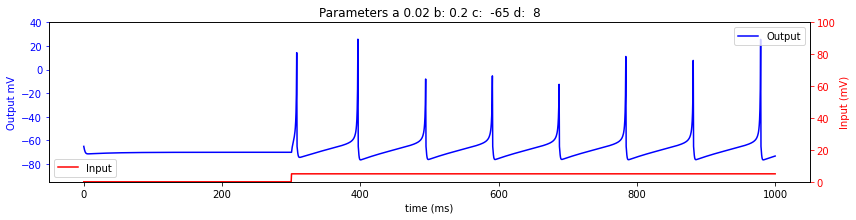

In [14]:
Izhikevich(0.02,0.2,-65,8)

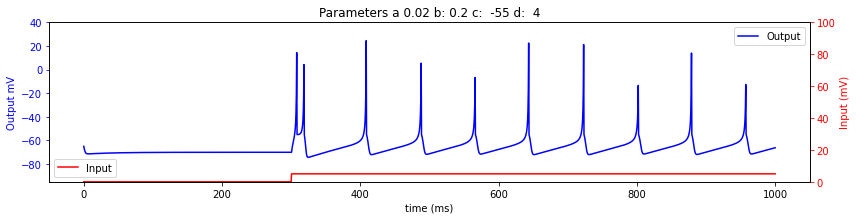

In [15]:
Izhikevich(0.02,0.2,-55,4)

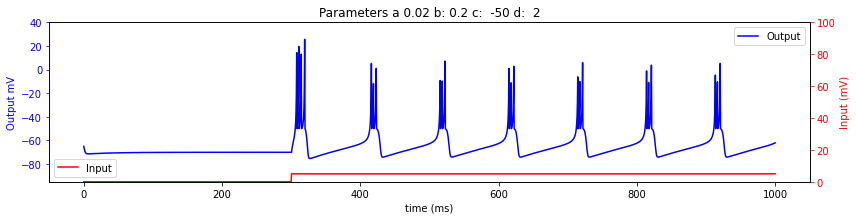

In [18]:
Izhikevich(0.02,0.2,-50,2)